<a href="https://colab.research.google.com/github/muhammadarslanshahzad/100-Days-Of-ML-Code/blob/master/Day_34_of_100_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
from keras.models import Sequential
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.layers import BatchNormalization
import pickle
import os
import warnings
warnings.filterwarnings("ignore")       
plt.style.use('fivethirtyeight') 

from google.colab import files
uploaded = files.upload()

Saving TestData.csv to TestData.csv
Saving TrainData.csv to TrainData.csv


In [ ]:
import io
train = pd.read_csv(io.BytesIO(uploaded['TrainData.csv']))
test = pd.read_csv(io.BytesIO(uploaded['TestData.csv']))
train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0


In [ ]:
train.shape

(12844, 785)

In [ ]:
train_label=train['label']
train_label.head()
trainset=train.drop(['label'],axis=1)
trainset.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(12844, 28, 28, 1)


In [ ]:
test_label=test['label']
X_test=test.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(4267, 784)


,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_774,pixel_775,pixel_776,pixel_777,pixel_778,pixel_779,pixel_780,pixel_781,pixel_782,pixel_783
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,255,255,255,255,255,255,253,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

print(y_train)
print(
    "y test :"
)
print(y_test)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]
y test :
[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(12844, 28, 28, 1) (12844, 27) (4267, 28, 28, 1) (4267, 27)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

Data sampling

In [ ]:
base={0:'0',1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',11:'K',12:'L',13:'M',14:'N',
      15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T',21:'U',22:'V',23:'W',24:'X',25:'Y',26:'Z'}

In [ ]:
label = np.argmax(y_train,axis=1)
label

array([ 0,  0,  0, ..., 26, 26, 26])

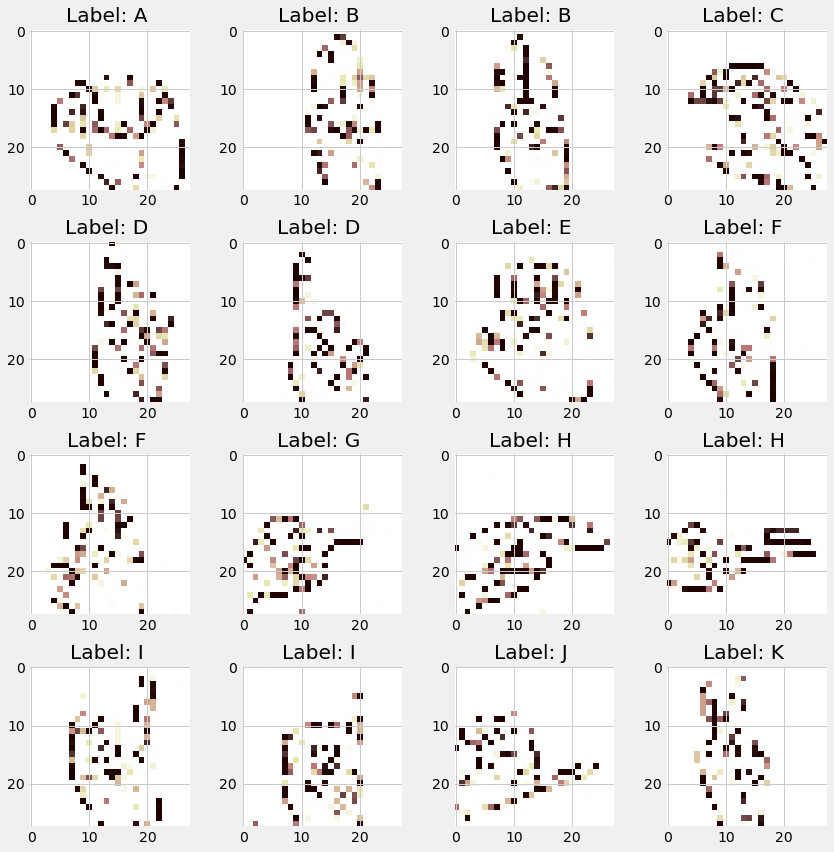

In [ ]:
f, mx= plt.subplots(4,4,figsize=(12,12))
k=800
for i in range(4):
    for j in range(4):
        mx[i,j].set_title("Label: {} ".format(base[label[k]]))
        mx[i,j].imshow(X_train[k].reshape(28,28),cmap='pink')
        k+=300
        
    plt.tight_layout()

Modeling

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))

model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Conv2D(16,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=27,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 16)         0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
X_test.shape,y_test.shape,X_train.shape,y_train.shape

((4267, 28, 28, 1), (4267, 27), (12844, 28, 28, 1), (12844, 27))

In [ ]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 13,
          validation_data=(X_test,y_test),
          shuffle=1)

Epoch 1/13
65/65 [==============================] - 35s 550ms/step - loss: 2.8073 - accuracy: 0.1668 - val_loss: 2.1065 - val_accuracy: 0.3187
Epoch 2/13
65/65 [==============================] - 35s 537ms/step - loss: 2.3409 - accuracy: 0.2667 - val_loss: 1.6132 - val_accuracy: 0.4825
Epoch 3/13
65/65 [==============================] - 36s 558ms/step - loss: 2.1037 - accuracy: 0.3372 - val_loss: 1.3626 - val_accuracy: 0.5463
Epoch 4/13
65/65 [==============================] - 35s 537ms/step - loss: 1.9120 - accuracy: 0.3873 - val_loss: 1.3739 - val_accuracy: 0.5610
Epoch 5/13
65/65 [==============================] - 35s 536ms/step - loss: 1.7076 - accuracy: 0.4429 - val_loss: 1.1779 - val_accuracy: 0.5978
Epoch 6/13
65/65 [==============================] - 35s 538ms/step - loss: 1.5697 - accuracy: 0.4843 - val_loss: 1.2054 - val_accuracy: 0.6161
Epoch 7/13
65/65 [==============================] - 35s 544ms/step - loss: 1.4564 - accuracy: 0.5189 - val_loss: 1.1661 - val_accuracy: 0.6428

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

134/134 [==============================] - 4s 31ms/step - loss: 0.6086 - accuracy: 0.7797


In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 77.97046899795532%


In [ ]:
pd=model.predict(X_test) 
classes_x=np.argmax(pd,axis=1)

In [ ]:
pd[0],classes_x[0]

(array([9.9999475e-01, 3.7414773e-13, 7.0051054e-10, 1.4683895e-13,
        4.7832015e-07, 1.6433778e-12, 1.7603243e-09, 1.5580238e-07,
        4.5311211e-08, 2.6985977e-10, 1.8938568e-11, 2.9659757e-08,
        1.0454515e-12, 4.6080440e-12, 1.5794725e-11, 1.9429978e-09,
        1.2758615e-07, 2.1838616e-10, 1.7790485e-06, 1.5450433e-14,
        8.3800765e-11, 2.4871938e-06, 2.3266573e-07, 1.0168194e-09,
        5.3954069e-10, 3.9259381e-12, 1.8864220e-08], dtype=float32), 0)

In [ ]:
len(classes_x),len(pd)

(4267, 4267)

Predicted: 5


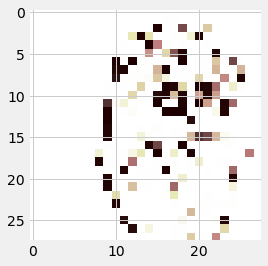

In [ ]:
print("Predicted: {}".format(classes_x[800]))
plt.imshow(X_test[800].reshape(28,28),cmap='pink')

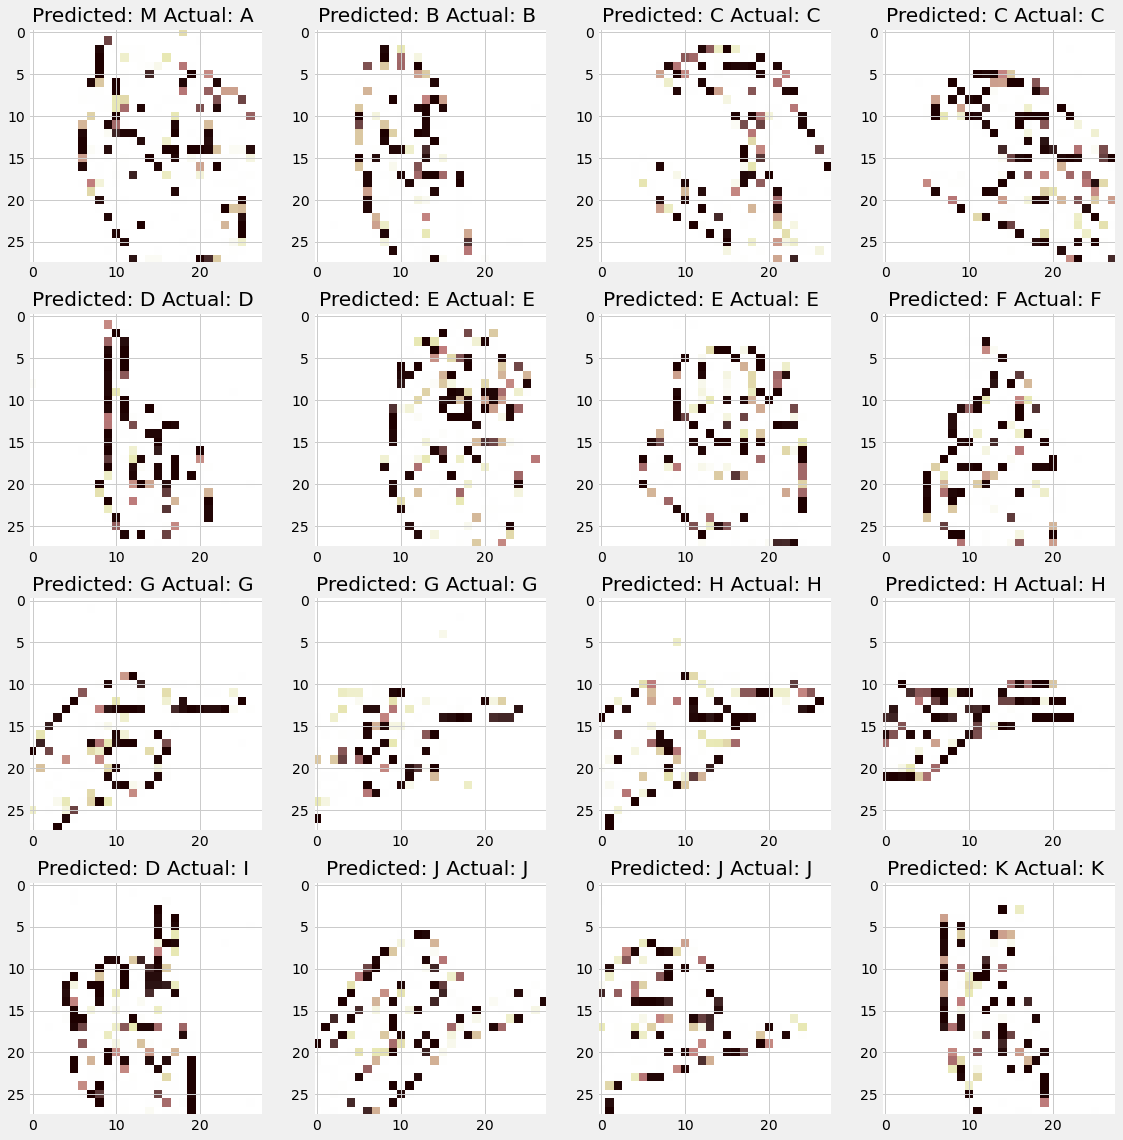

In [ ]:
actual = np.argmax(y_test,axis=1)
f, mx= plt.subplots(4,4,figsize=(16,16))
k=300
for i in range(4):
    for j in range(4):
        mx[i,j].set_title("Predicted: {} Actual: {} ".format(base[classes_x[k]],base[actual[k]]))
        mx[i,j].imshow(X_test[k].reshape(28,28),cmap='pink')
        k+=100
        
    plt.tight_layout()
